## Import Pandas Module and Data Set

In [395]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [443]:
hotel_df = pd.read_csv('hotel_booking.csv')
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [397]:
hotel_df.corr()['is_canceled']

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

<AxesSubplot:>

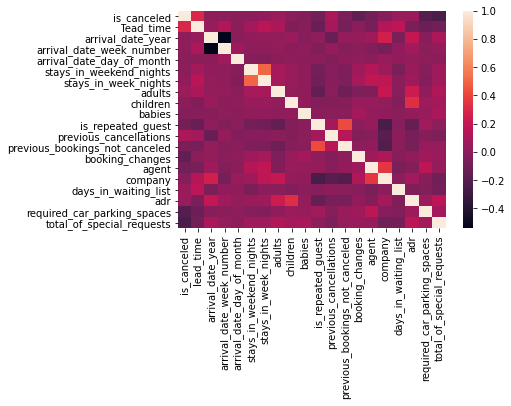

In [398]:
import seaborn as sns
corr = hotel_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [399]:
print(hotel_df['distribution_channel'].value_counts())

hotel_df['market_segment'].value_counts()

#The columns distribution channel and market segment are giving different information about the bookings. 
#The market segment column has more information then the distribution channel column, so we keep it and 
#drop the other?

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<AxesSubplot:>

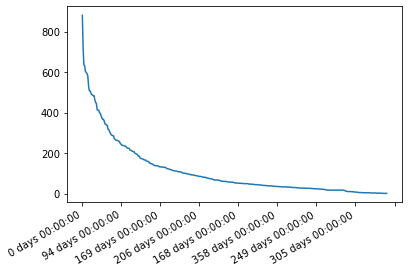

In [400]:
df2 = hotel_df[(hotel_df['reservation_status'] != 'Check-Out') & (hotel_df['reservation_status'] != 'No-Show')]
df2 = df2[['reservation_status','reservation_status_date', 'arrival_date_year','arrival_date_month','arrival_date_day_of_month', 'lead_time']]
df2['arrival_date'] = hotel_df['arrival_date_year'].astype(str) + '-' + hotel_df['arrival_date_month'].astype(str) + '-' + hotel_df['arrival_date_day_of_month'].astype(str)
df2.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month'],axis=1,inplace=True)
df2['arrival_date'] = pd.to_datetime(df2['arrival_date'])
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])
df2['cancellation_before_arrival'] = df2['arrival_date'] - df2['reservation_status_date']
df2['cancellation_before_arrival'].value_counts().plot()

#this graph tells us that most cancellations were made closer to arrival date. 

In [401]:
hotel_df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [451]:
sum(hotel_df['agent'].value_counts() >1)

283

In [402]:
#information in agent is captured in the distribution_channel and market_segment columns
#company column has a lot of NA values ~80% of the dataset
#Values in the name, email, phone-number, credit card column are mostly unique and will not help in prediction
#reservation status is highly correlated with the is_canceled column. We will count the no-show as not canceled. 
#the date at which the reservation status is captured by the reservation_status_date column. We cannot use that 
#column since it has information that one will have after making the prediction. 
hotel_df = hotel_df.drop(['name','email','phone-number', 'credit_card','company', 'agent', 'reservation_status','reservation_status_date', 'distribution_channel'], axis=1)

# Print out the first line
hotel_df.iloc[0]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  342
arrival_date_year                         2015
arrival_date_month                        July
arrival_date_week_number                    27
arrival_date_day_of_month                    1
stays_in_weekend_nights                      0
stays_in_week_nights                         0
adults                                       2
children                                   0.0
babies                                       0
meal                                        BB
country                                    PRT
market_segment                          Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
reserved_room_type                           C
assigned_room_type                           C
booking_changes                              3
deposit_type 

## Data Exploration

In [403]:
hotel_df.info()
#country has some missing values
#keep or drop? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [404]:
# Look at the unqiue values for each column
for col in hotel_df.columns:
    print(col)
    print(hotel_df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
is_canceled
[0 1]
lead_time
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

(array([40060.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 79330.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

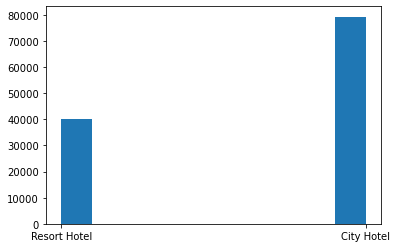

In [405]:
hist(hotel_df['hotel'])

In [406]:
hotel_df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

<AxesSubplot:>

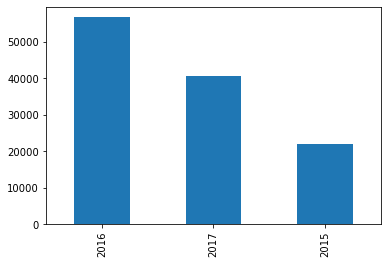

In [407]:
hotel_df['arrival_date_year'].value_counts().plot(kind = 'bar')
#2016 was a popular year and 2015 had the lowest number of bookings. 
#Seems like the hotels had average number of bookings in 2017.

<AxesSubplot:xlabel='arrival_date_year'>

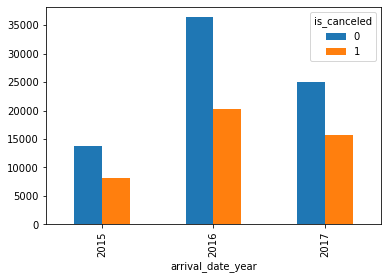

In [408]:
pd.pivot_table(index='is_canceled',columns='arrival_date_year',values='lead_time',aggfunc = 'count',data=hotel_df).T.plot(kind='bar')

<AxesSubplot:>

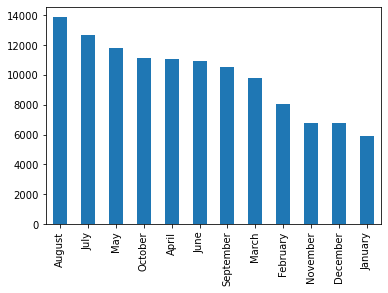

In [409]:
hotel_df['arrival_date_month'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='arrival_date_month'>

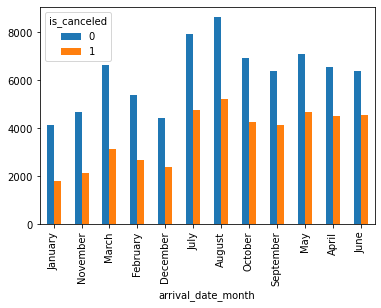

In [410]:
#Cancellations by month, arranged in increasing proportion of cancellations
y = pd.pivot_table(index='is_canceled',columns='arrival_date_month',values='lead_time',aggfunc = 'count',data=hotel_df).T
y['ratio'] = y[1]/(y[0]+y[1])
y = y.sort_values(by='ratio')
y[[0,1]].plot(kind='bar')

In [411]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [412]:
pd.pivot_table(index='is_canceled',columns='hotel',values ='lead_time',aggfunc='count',data=hotel_df)

hotel,City Hotel,Resort Hotel
is_canceled,,
0,46228,28938
1,33102,11122


In [413]:
#cancellation by hotel - more cancellations in city hotel than resort hotel
pd.pivot_table(index='hotel', columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled,0,1
hotel,,
City Hotel,46228,33102
Resort Hotel,28938,11122


In [414]:
#cancellation by hotel and the values represent mean lead time - greater lead time on average for cancellations
pd.pivot_table(index='is_canceled', columns='hotel', values='lead_time',aggfunc = 'mean',data=hotel_df)

hotel,City Hotel,Resort Hotel
is_canceled,,
0,80.702734,78.837618
1,150.281222,128.680543


In [415]:
#cancellation by hotel and whether the guest is a repeating guest or not - higher percentage of cancellations in first timers
pd.pivot_table(index=['hotel','is_repeated_guest'], columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled                         0      1
hotel        is_repeated_guest              
City Hotel   0                  44637  32661
             1                   1591    441
Resort Hotel 0                  27271  11011
             1                   1667    111

In [416]:
#very high cancellatoins when booked through TA/TO
pd.pivot_table(index='market_segment', columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled,0,1
market_segment,,
Aviation,185.0,52.0
Complementary,646.0,97.0
Corporate,4303.0,992.0
Direct,10672.0,1934.0
Groups,7714.0,12097.0
Offline TA/TO,15908.0,8311.0
Online TA,35738.0,20739.0
Undefined,NaN,2.0


Groups and OTA channel have extremely high cancellation rate.

In [417]:
pd.pivot_table(index=['market_segment','is_repeated_guest'], columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')

is_canceled                             0        1
market_segment is_repeated_guest                  
Aviation       0                    132.0     41.0
               1                     53.0     11.0
Complementary  0                    435.0     78.0
               1                    211.0     19.0
Corporate      0                   2924.0    897.0
               1                   1379.0     95.0
Direct         0                   9933.0   1877.0
               1                    739.0     57.0
Groups         0                   7668.0  11873.0
               1                     46.0    224.0
Offline TA/TO  0                  15624.0   8216.0
               1                    284.0     95.0
Online TA      0                  35192.0  20688.0
               1                    546.0     51.0
Undefined      0                      NaN      2.0

In [418]:
x = pd.pivot_table(index='children', columns='is_canceled', values='lead_time', data=hotel_df, aggfunc='count')
x['ratio'] = x[1]/(x[1]+x[0])

<AxesSubplot:xlabel='children', ylabel='proportion of cancellations'>

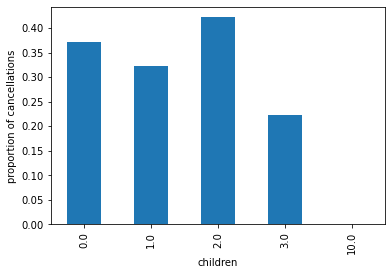

In [419]:
x['ratio'].plot(kind='bar', ylabel = 'proportion of cancellations')

In [420]:
month_cancel = pd.pivot_table(index='is_canceled', columns='arrival_date_month', values='lead_time', data=hotel_df, aggfunc='count') 
month_cancel/month_cancel.apply(sum)



arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
is_canceled,,,,,,,,,,,,
0,0.592028,0.622469,0.650295,0.66584,0.695227,0.625464,0.585428,0.678477,0.603342,0.687666,0.619534,0.608298
1,0.407972,0.377531,0.349705,0.33416,0.304773,0.374536,0.414572,0.321523,0.396658,0.312334,0.380466,0.391702


In [421]:
pd.pivot_table(index='is_canceled', columns='customer_type', values='lead_time', data=hotel_df, aggfunc='count') 

customer_type,Contract,Group,Transient,Transient-Party
is_canceled,,,,
0,2814,518,53099,18735
1,1262,59,36514,6389


In [422]:
sum(hotel_df[hotel_df['reserved_room_type'] != hotel_df['assigned_room_type']]['is_canceled'] != 0)

802

In [423]:
pd.pivot_table(index='is_canceled', columns='deposit_type', values='lead_time', data=hotel_df, aggfunc='count')

deposit_type,No Deposit,Non Refund,Refundable
is_canceled,,,
0,74947,93,126
1,29694,14494,36


required_car_parking_spaces        0       1     2    3    8
is_canceled                                                 
0                            67750.0  7383.0  28.0  3.0  2.0
1                            44224.0     NaN   NaN  NaN  NaN


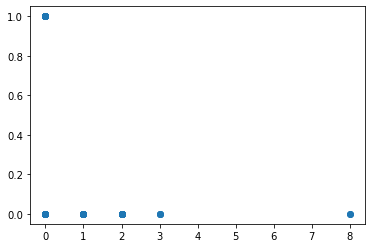

In [424]:
plt.scatter(hotel_df['required_car_parking_spaces'], hotel_df['is_canceled'])
print(hotel_df.pivot_table(columns = 'required_car_parking_spaces', index = 'is_canceled', values = 'lead_time', aggfunc = 'count'))



In [27]:
#number of cancellations go down as more changes are made to the booking
pd.pivot_table(index='is_canceled', columns='booking_changes', values='lead_time', data=hotel_df, aggfunc='count')
#df_svm = hotel_df.copy(deep=True)

booking_changes,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,20,21
is_canceled,,,,,,,,,,,,,,,,,,,,,
0,59923.0,10894.0,3039.0,783.0,309.0,98.0,45.0,28.0,13.0,7.0,...,2.0,2.0,5.0,4.0,3.0,1.0,2.0,1.0,1.0,1.0
1,41391.0,1807.0,766.0,144.0,67.0,20.0,18.0,3.0,4.0,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


## Create a new data frame for fit and prediction

In [83]:
new_hotel = hotel_df[['hotel', 'is_canceled', 'arrival_date_whole','market_segment','customer_type','deposit_type','booking_changes','lead_time','is_repeated_guest']].copy()
new_hotel.iloc[0]

hotel                        Resort Hotel
is_canceled                             0
arrival_date_whole    2015-07-01 00:00:00
market_segment                     Direct
customer_type                   Transient
deposit_type                   No Deposit
booking_changes                         3
lead_time                             342
is_repeated_guest                       0
Name: 0, dtype: object

## Date Preprocessing

In [84]:
new_hotel['hotel'] = new_hotel['hotel'].map(lambda x: 1 if x=='Resort Hotel' else 0)
new_hotel['arrival_month'] = pd.DatetimeIndex(new_hotel['arrival_date_whole']).month
new_hotel['arrival_year'] = pd.DatetimeIndex(new_hotel['arrival_date_whole']).year

In [85]:
# Create dummy columns for the categorical columns
deposit = pd.get_dummies(new_hotel['deposit_type'])
market = pd.get_dummies(new_hotel['market_segment'])
customer = pd.get_dummies(new_hotel['customer_type'])
new_hotel = pd.concat([new_hotel, deposit,market,customer], axis=1)
new_hotel.head()

,hotel,is_canceled,arrival_date_whole,market_segment,customer_type,deposit_type,booking_changes,lead_time,is_repeated_guest,arrival_month,...,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Contract,Group,Transient,Transient-Party
0,1,0,2015-07-01,Direct,Transient,No Deposit,3,342,0,7,...,0,1,0,0,0,0,0,0,1,0
1,1,0,2015-07-01,Direct,Transient,No Deposit,4,737,0,7,...,0,1,0,0,0,0,0,0,1,0
2,1,0,2015-07-01,Direct,Transient,No Deposit,0,7,0,7,...,0,1,0,0,0,0,0,0,1,0
3,1,0,2015-07-01,Corporate,Transient,No Deposit,0,13,0,7,...,1,0,0,0,0,0,0,0,1,0
4,1,0,2015-07-01,Online TA,Transient,No Deposit,0,14,0,7,...,0,0,0,0,1,0,0,0,1,0


In [86]:
# Drop the columns
new_hotel.drop(['arrival_date_whole', 'market_segment', 'customer_type', 'deposit_type'], axis=1, inplace=True)
new_hotel.head()

,hotel,is_canceled,booking_changes,lead_time,is_repeated_guest,arrival_month,arrival_year,No Deposit,Non Refund,Refundable,...,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Contract,Group,Transient,Transient-Party
0,1,0,3,342,0,7,2015,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,4,737,0,7,2015,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,7,0,7,2015,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,13,0,7,2015,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,14,0,7,2015,1,0,0,...,0,0,0,0,1,0,0,0,1,0


## Train and Test data split

In [87]:
from sklearn.model_selection import train_test_split
X = new_hotel.copy().drop('is_canceled',axis=1)
y = new_hotel['is_canceled'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
training_acc = []
test_acc = []
setting = range(1,11)
for i in setting:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    training_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))
plot(setting, training_acc, label='training accuracy')
plot(setting, test_acc, label='test_accuracy')
legend()
show()

In [90]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7639026371227696

In [93]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7710601791923652

## Linear Regression

In [92]:
import statsmodels.api as sm
model = sm.OLS(y, X)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_canceled   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     2715.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:49:54   Log-Likelihood:                -62014.
No. Observations:              119390   AIC:                         1.241e+05
Df Residuals:                  119371   BIC:                         1.242e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
hotel                -0.0341      0.003    -13.201      0.000      -0.039      -0.029
booking_changes      -0.0591      0.002    -32.110      0.000      -0.063      -0.056
lead_time             0.0007   1.32e-05     50.200      0.000       0.001       0.001
is_repeated_guest    -0.0567      0.007     -7.870      0.000      -0.071      -0.043
arrival_month         0.0001      0.000      0.303      0.762      -0.001       0.001
arrival_year          0.0009      0.002      0.414      0.679      -0.003       0.005
No Deposit           -0.8153      1.995     -0.409      0.683      -4.725       3.095
Non Refund           -0.1704      1.994     -0.085      0.932      -4.079       3.739
Refundable           -0.8228      1.995     -0.412      0.680      -4.733       3.087
Aviation             -0.3011      0.750     -0.402      0.688      -1.770       1.168
Complementary        -0.3815      0.749     -0.510      0.610      -1.849       1.086
Corporate            -0.3520      0.749     -0.470      0.638      -1.819       1.116
Direct               -0.3827      0.749     -0.511      0.609      -1.850       1.085
Groups               -0.3047      0.748     -0.407      0.684      -1.772       1.162
Offline TA/TO        -0.3830      0.749     -0.512      0.609      -1.850       1.084
Online TA            -0.2121      0.749     -0.283      0.777      -1.680       1.256
Undefined             0.5086      0.790      0.644      0.520      -1.040       2.057
Contract             -0.4803      1.495     -0.321      0.748      -3.411       2.451
Group                -0.4964      1.496     -0.332      0.740      -3.429       2.436
Transient            -0.3847      1.496     -0.257      0.797      -3.318       2.548
Transient-Party      -0.4471      1.496     -0.299      0.765      -3.379       2.485
==============================================================================
Omnibus:                    18168.354   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18154.804
Skew:                           0.888   Prob(JB):                         0.00
Kurtosis:                       2.297   Cond. No.                     1.38e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

cdf = pd.DataFrame(lr.coef_.T, X.columns, columns=['Coefficients'])
print(cdf.sort_values(by='Coefficients'))

0.7598162389908373
                   Coefficients
No Deposit            -2.085603
Direct                -0.581211
Offline TA/TO         -0.488214
booking_changes       -0.407791
Transient-Party       -0.379345
is_repeated_guest     -0.268958
hotel                 -0.236738
Corporate             -0.170436
Contract              -0.107183
Complementary         -0.059746
Group                 -0.048130
Refundable            -0.035732
Aviation              -0.005607
arrival_year           0.000165
Undefined              0.002202
arrival_month          0.002949
lead_time              0.004573
Online TA              0.473291
Transient              0.534897
Groups                 0.829959
Non Refund             2.121574


c:\users\dxzha\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

0.7780908144876774


booking_changes      0.348458
No Deposit           0.339702
is_repeated_guest    0.112110
arrival_month        0.049495
Offline TA/TO        0.043373
is_canceled          0.027248
hotel                0.026325
Transient            0.016466
Direct               0.009377
lead_time            0.004638
Groups               0.004388
Group                0.004309
Corporate            0.003792
Complementary        0.003255
Undefined            0.003186
Aviation             0.001490
Contract             0.001188
arrival_year         0.000473
Refundable           0.000434
Non Refund           0.000233
Online TA            0.000058
dtype: float64

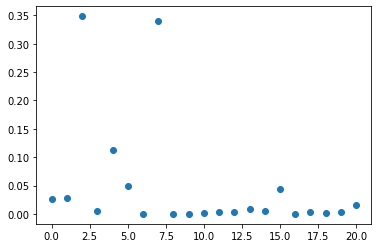

In [113]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))
plot(tree.feature_importances_, 'o')
dict={}
for k, v in zip(new_hotel.columns,tree.feature_importances_):
    dict[k] = v
pd.Series(dict).sort_values(ascending=False)

# Support Vector Machine

# Naive Bayes

In [427]:
df_nb = hotel_df.copy(deep=True)
df_nb.head()

#we created a new column to see if assigned room was different from reserved room 
df_nb['assigned_is_reserved']  = df_nb['assigned_room_type'] == df_nb['reserved_room_type']
df_nb['assigned_is_reserved'] = df_nb['assigned_is_reserved'].map(lambda x: 1 if(x) else 0)

#we have dropped country for now, but we want to employ it as a predictor by grouping countries into continents maybe?
df_nb.drop(['babies','arrival_date_week_number','arrival_date_day_of_month','arrival_date_year','arrival_date_month','required_car_parking_spaces','days_in_waiting_list','country','assigned_room_type','reserved_room_type'], axis=1, inplace=True)

#map 1 and 0 to Resort Hotel and City Hotel respectively
df_nb['hotel'] = df_nb['hotel'].map(lambda x: 1 if x == 'Resort Hotel' else 0)

#Undefined is the same as SC
df_nb['meal'] = df_nb['meal'].map(lambda x: 'SC' if x == 'Undefined' else x)

#this column can be made into yes or no - binning will not work
df_nb['previous_cancellations'] = df_nb['previous_cancellations'].map(lambda x: 1 if x>0 else 0)

#we are changing the values in this column to reflect if there was a previous booking that was not canceled
df_nb['previous_bookings_not_canceled'] = df_nb['previous_bookings_not_canceled'].map(lambda x: 1 if x>0 else 0)

#this column will tell us if there were any booking changes
df_nb['booking_changes'] = df_nb['booking_changes'].map(lambda x: 1 if x>0 else 0)

#we could also use cut() instead of qcut() to manually define the boundaries and not get error from qcut()
#there were 400 rows which had a value zero for the adults column so we decided to drop them
df_nb.drop(df_nb[df_nb['adults'] == 0].index, inplace=True)

#drop 4 rows with missing value for children
df_nb.dropna(inplace=True)

#one hot encoding the categorical variables
categorical_cols = ['meal','market_segment','deposit_type','customer_type']
df_nb = pd.concat([df_nb, pd.get_dummies(df_nb[categorical_cols])],axis=1)
df_nb.drop(['meal','market_segment','deposit_type','customer_type'],axis=1,inplace=True)

more_cat_cols = ['hotel','adults','children','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','total_of_special_requests','assigned_is_reserved']
df_nb[more_cat_cols] = df_nb[more_cat_cols].astype(str)
df_nb = pd.concat([df_nb, pd.get_dummies(df_nb[more_cat_cols])],axis=1)
df_nb.drop( ['hotel','adults','children','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','total_of_special_requests','assigned_is_reserved'],axis=1,inplace=True)

df_nb.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,booking_changes,adr,meal_BB,meal_FB,meal_HB,meal_SC,...,previous_bookings_not_canceled_0,previous_bookings_not_canceled_1,total_of_special_requests_0,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3,total_of_special_requests_4,total_of_special_requests_5,assigned_is_reserved_0,assigned_is_reserved_1
0,0,342,0,0,1,0.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,0,737,0,0,1,0.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,0,7,0,1,0,75.0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,0,13,0,1,0,75.0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0,14,0,2,0,98.0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [428]:
df_nbm = df_nb.copy(deep=True)
df_nbg = df_nb.copy(deep=True)

# Naive Bayes Multinomial

In [432]:
data_X = df_nbm.drop(['is_canceled'],axis = 1)
data_Y =  df_nbm['is_canceled']
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size = 0.33, random_state=42)


#qcut to bin continuous variables
X_train['lead_time_b'], lt = pd.qcut(X_train['lead_time'],3, retbins = True)
X_train['weekend'], wknd = pd.qcut(X_train['stays_in_weekend_nights'],3, duplicates = 'drop', retbins = True)
X_train['week'], wk = pd.qcut(X_train['stays_in_week_nights'],3, duplicates = 'drop', retbins = True)
X_train['adr_b'], adr = pd.qcut(X_train['adr'],3, duplicates = 'drop', retbins = True)
X_train.drop(['lead_time','stays_in_weekend_nights','stays_in_week_nights','adr'],axis=1,inplace=True)

cat_cols = ['lead_time_b','weekend','week','adr_b']
X_train = pd.concat([X_train, pd.get_dummies(X_train[cat_cols])],axis=1)
X_train.drop(['lead_time_b','weekend','week','adr_b'],axis=1,inplace=True)


clf_nbm = MultinomialNB()
clf_nbm.fit(X_train,Y_train)
scores = cross_val_score(clf_nbm, X_train, Y_train, cv=10)
print("Accuracy: " , scores.mean()*100)


X_test['lead_time_b']= pd.cut(X_test['lead_time'],bins = lt, include_lowest = True)
X_test['weekend']= pd.cut(X_test['stays_in_weekend_nights'],bins = wknd, include_lowest = True)
X_test['week']= pd.cut(X_test['stays_in_week_nights'],bins = wk, include_lowest = True)
X_test['adr_b']= pd.cut(X_test['adr'],bins = adr, include_lowest = True)
X_test.drop(['lead_time','stays_in_weekend_nights','stays_in_week_nights','adr'],axis=1,inplace=True)

cat_cols = ['lead_time_b','weekend','week','adr_b']
X_test = pd.concat([X_test, pd.get_dummies(X_test[cat_cols])],axis=1)
X_test.drop(['lead_time_b','weekend','week','adr_b'],axis=1,inplace=True)

y_pred = clf_nbm.predict(X_test) 
sum(y_pred == Y_test)/len(Y_test)

<ipython-input-432-4c187e1e1eb9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['lead_time_b'], lt = pd.qcut(X_train['lead_time'],3, retbins = True)
<ipython-input-432-4c187e1e1eb9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['weekend'], wknd = pd.qcut(X_train['stays_in_weekend_nights'],3, duplicates = 'drop', retbins = True)
<ipython-input-432-4c187e1e1eb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

Accuracy:  78.16804509548317


<ipython-input-432-4c187e1e1eb9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['lead_time_b']= pd.cut(X_test['lead_time'],bins = lt, include_lowest = True)
<ipython-input-432-4c187e1e1eb9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['weekend']= pd.cut(X_test['stays_in_weekend_nights'],bins = wknd, include_lowest = True)
<ipython-input-432-4c187e1e1eb9>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

0.7799821724181841

In [431]:
target_names = ['class 0','class 1']
print(classification_report(Y_test, y_pred , target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.91      0.84     24717
     class 1       0.79      0.56      0.65     14548

    accuracy                           0.78     39265
   macro avg       0.78      0.73      0.75     39265
weighted avg       0.78      0.78      0.77     39265



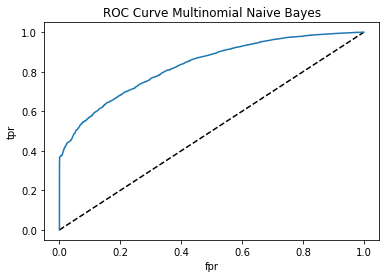

0.8318201009861103


In [433]:
from sklearn import metrics
prob = clf_nbm.fit(X_train, Y_train).predict_proba(X_test)
rare = []
for i in prob:
    rare.append(i[1])
fpr, tpr, thresholds = metrics.roc_curve(Y_test, rare)


plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Multinomial Naive Bayes')
plt.show()
auc = metrics.roc_auc_score(Y_test,rare)
print(auc)

# Naive Bayes Gaussian

In [434]:
data_X = df_nbg.drop(['is_canceled'],axis = 1)
data_Y =  df_nbg['is_canceled']
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size = 0.33, random_state = 42)

clf_nbg = GaussianNB()
clf_nbg.fit(X_train,Y_train)
scores = cross_val_score(clf_nbg, X_train, Y_train, cv=10)
print("Accuracy: " , scores.mean()*100)

y_pred_nbg = clf_nbg.predict(X_test)
sum(y_pred_nbg == Y_test)/len(Y_test)

target_names = ['class 0','class 1']
print(classification_report(Y_test, y_pred_nbg , target_names = target_names))


Accuracy:  77.11182259851522
              precision    recall  f1-score   support

     class 0       0.74      0.98      0.84     24717
     class 1       0.91      0.43      0.58     14548

    accuracy                           0.77     39265
   macro avg       0.83      0.70      0.71     39265
weighted avg       0.80      0.77      0.75     39265



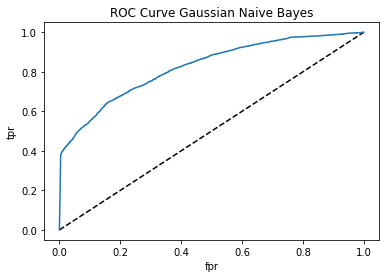

0.8239663338177057


In [436]:
from sklearn import metrics
prob = clf_nbg.fit(X_train, Y_train).predict_proba(X_test)
rare = []
for i in prob:
    rare.append(i[1])
fpr, tpr, thresholds = metrics.roc_curve(Y_test, rare)


plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Gaussian Naive Bayes')
plt.show()
auc = metrics.roc_auc_score(Y_test,rare)
print(auc)

In [ ]:
#KNN with cross validation

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# MinMaxScaler(copy = True)
# scaler.fit(data)
# npy = scaler.transform(data)
# new = pd.DataFrame(data= npy)

# from sklearn.model_selection import GridSearchCV
# k = np.arange(30)+1
# params = {'n_neighbors': k}
# grid_search = GridSearchCV(kclf, params, cv=10)
# grid_search.fit(data_X, data_Y)
# print(grid_search.best_params_)

# from sklearn.neighbors import KNeighborsClassifier
# k =5
# kclf = KNeighborsClassifier(n_neighbors=k)
# accuracy = cross_val_score(kclf, data_X, data_Y, cv=10)
# precision = cross_val_score(kclf, data_X, data_Y, cv=10, scoring='precision')
# recall = cross_val_score(kclf, data_X, data_Y, cv=10, scoring='recall')
# print('Accuracy: ', accuracy.mean()*100)
# print('Precision: ', precision.mean()*100)
# print('Recall: ', recall.mean()*100)

# from sklearn.model_selection import cross_val_predict
# y_pred = cross_val_predict(clf,data_X, data_Y)
# cm = confusion_matrix(data_Y, y_pred,labels)
# print(cm)
# target_names = ['class 0','class 1']
# print(classification_report(data_Y, y_pred, target_names = target_names))


# X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size = 0.20)
# prob = clf.fit(X_train, Y_train).predict_proba(X_test)
# rare = []
# for i in prob:
#     rare.append(i[1])
# fpr, tpr, thresholds = metrics.roc_curve(Y_test, rare)

# #replace these fpr and tpr with the results of your roc_curve
# fpr, tpr = fpr, tpr
# # Do not change this code! This plots the ROC curve.
# # Just replace the fpr and tpr above with the values from your roc_curve
# plt.plot([0,1],[0,1],'k--') #plot the diagonal line
# plt.plot(fpr, tpr, label='NB') #plot the ROC curve
# plt.xlabel('fpr')
# plt.ylabel('tpr')
# plt.title('ROC Curve Naive Bayes')
# plt.show()
# auc = metrics.roc_auc_score(Y_test,rare)
# print(auc)